# Dataset exploration

We will explore the dataset to understand its structure and content.

Also we will check the content length to set the max length for the tokenizer.

In [1]:
from data.pubmed.from_json import FromJsonDataset
import pandas as pd

In [2]:
dataset = FromJsonDataset(json_file="../data/pubmed_500K.json")
dataset[0]

{'title': "[Biochemical studies on camomile components/III. In vitro studies about the antipeptic activity of (--)-alpha-bisabolol (author's transl)].",
 'content': '(--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value. The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5. The antipeptic action of bisabolol only occurs in case of direct contact. In case of a previous contact with the substrate, the inhibiting effect is lost.',
 'contents': "[Biochemical studies on camomile components/III. In vitro studies about the antipeptic activity of (--)-alpha-bisabolol (author's transl)]. (--)-alpha-Bisabolol has a primary antipeptic action depending on dosage, which is not caused by an alteration of the pH-value. The proteolytic activity of pepsin is reduced by 50 percent through addition of bisabolol in the ratio of 1/0.5. The antipeptic action of bisabolol only o

In [3]:
rows = []
for i in range (0, 1000):
    rows.append(dataset[i])

# create a dataframe
frame = pd.DataFrame(rows)

In [4]:
frame.head(10)

,title,content,contents,PMID,id
0,[Biochemical studies on camomile components/II...,(--)-alpha-Bisabolol has a primary antipeptic ...,[Biochemical studies on camomile components/II...,21,pubmed23n0001_0
1,[Demonstration of tumor inhibiting properties ...,A report is given on the recent discovery of o...,[Demonstration of tumor inhibiting properties ...,22,pubmed23n0001_1
2,Effect of etafenone on total and regional myoc...,The distribution of blood flow to the subendoc...,Effect of etafenone on total and regional myoc...,23,pubmed23n0001_2
3,Influence of a new virostatic compound on the ...,"The virostatic compound N,N-diethyl-4-[2-(2-ox...",Influence of a new virostatic compound on the ...,24,pubmed23n0001_3
4,Pharmacological properties of new neuroleptic ...,"RMI 61 140, RMI 61 144 and RMI 61 280 are newl...",Pharmacological properties of new neuroleptic ...,25,pubmed23n0001_4
5,[Studies on the action of an anticholinergic a...,A double-blind study with intra-individual com...,[Studies on the action of an anticholinergic a...,26,pubmed23n0001_5
6,Lysosomal hydrolases of the epidermis. I. Glyc...,Seven distinct glycosidases (EC 3.2) have been...,Lysosomal hydrolases of the epidermis. I. Glyc...,30,pubmed23n0001_6
7,Lysosomal hydrolases of the epidermis. 2. Este...,Five distinct ester hydrolases (EC 3-1) have b...,Lysosomal hydrolases of the epidermis. 2. Este...,31,pubmed23n0001_7
8,A serum haemagglutinating property dependent u...,A serum agglutinin reactive with red cells in ...,A serum haemagglutinating property dependent u...,32,pubmed23n0001_8
9,Effect of human erythrocyte stromata on comple...,Stroma from either normal or PNH-like red cell...,Effect of human erythrocyte stromata on comple...,33,pubmed23n0001_9


In [5]:
# add content length column by words
frame["contents_length"] = frame["contents"].apply(lambda x: len(x.split()))

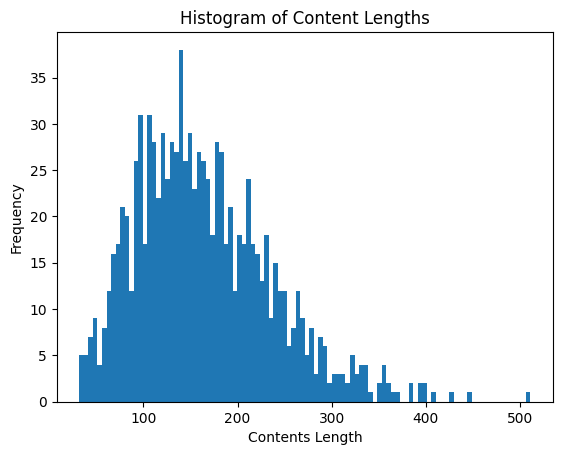

In [6]:
# plot the content length
import matplotlib.pyplot as plt


plt.hist(frame["contents_length"], bins=100)
plt.xlabel("Contents Length")
plt.ylabel("Frequency")
plt.title("Histogram of Content Lengths")
plt.show()

In [8]:
# get the longest content
longest_content = frame.loc[frame["contents_length"].idxmax()]
print(longest_content)

title              Renal response to acid loading in the developi...
content            Response of the fetal kidney to metabolic acid...
contents           Renal response to acid loading in the developi...
PMID                                                             479
id                                                 pubmed23n0001_273
contents_length                                                  511
Name: 273, dtype: object


In [9]:
from models_.building.pubmed_tokenizer import load_article_tokenizer

tokenizer = load_article_tokenizer()

In [10]:
longest_content_tokenized = tokenizer(
    longest_content["contents"],
    max_length=1000,
    truncation=True,
    padding="max_length",
)

# get the sum of attention mask
sum(longest_content_tokenized["attention_mask"])

655

## Conclusion
The longest content in the dataset is 640 tokens length, so we can set the max length to 800 tokens.